# Flight Price Prediction

### Problem Statement:

#### Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -
#### 1. Time of purchase patterns (making sure last-minute purchases are expensive)
#### 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
#### So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

# Importing the libraries

In [208]:
! pip install sweetviz -q
! pip install lime -q
! pip install pandas-profiling -q

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Loading the Dataset

### We have loaded the available dataset

In [2]:
df = pd.read_csv("D:\FlightPrices_WebScraping.csv")

# Further Preprocessing

#### Updated the column names for further analysis

In [3]:
df.columns = ["Airline_Name", "Source", "Destination", "Arrival_Time", "Departure_Time", "Number_of_Stops", "Price"]

In [4]:
df.head()

,Airline_Name,Source,Destination,Arrival_Time,Departure_Time,Number_of_Stops,Price
0,SpiceJet,BLR Bengaluru Intl,MAA Chennai,7:20,6:20,direct,6858
1,Air India,BLR Bengaluru Intl,MAA Chennai,8:05,7:05,direct,6698
2,Air India,BLR Bengaluru Intl,MAA Chennai,8:05,7:05,direct,6699
3,Air India,BLR Bengaluru Intl,MAA Chennai,8:05,7:05,direct,6699
4,Air India,BLR Bengaluru Intl,MAA Chennai,8:05,7:05,direct,6699


# Preporcessing


### The dataset has 1981 rows (records) and 7 columns (features) that includes the target variable "Price"

In [5]:
print("Total Data:", df.shape)

Total Data: (1981, 7)


# EDA using Sweetviz library

                                             |          | [  0%]   00:00 -> (? left)


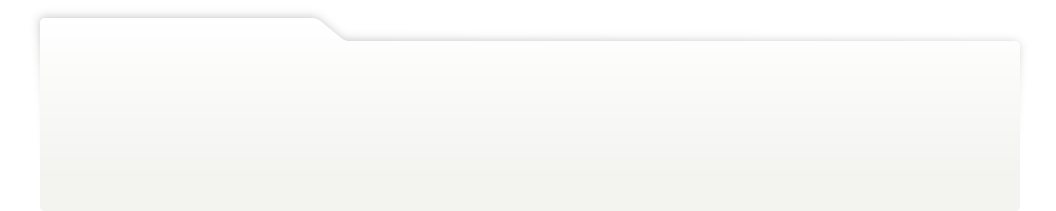
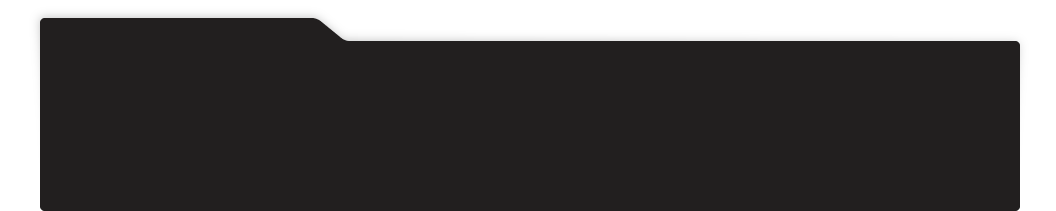
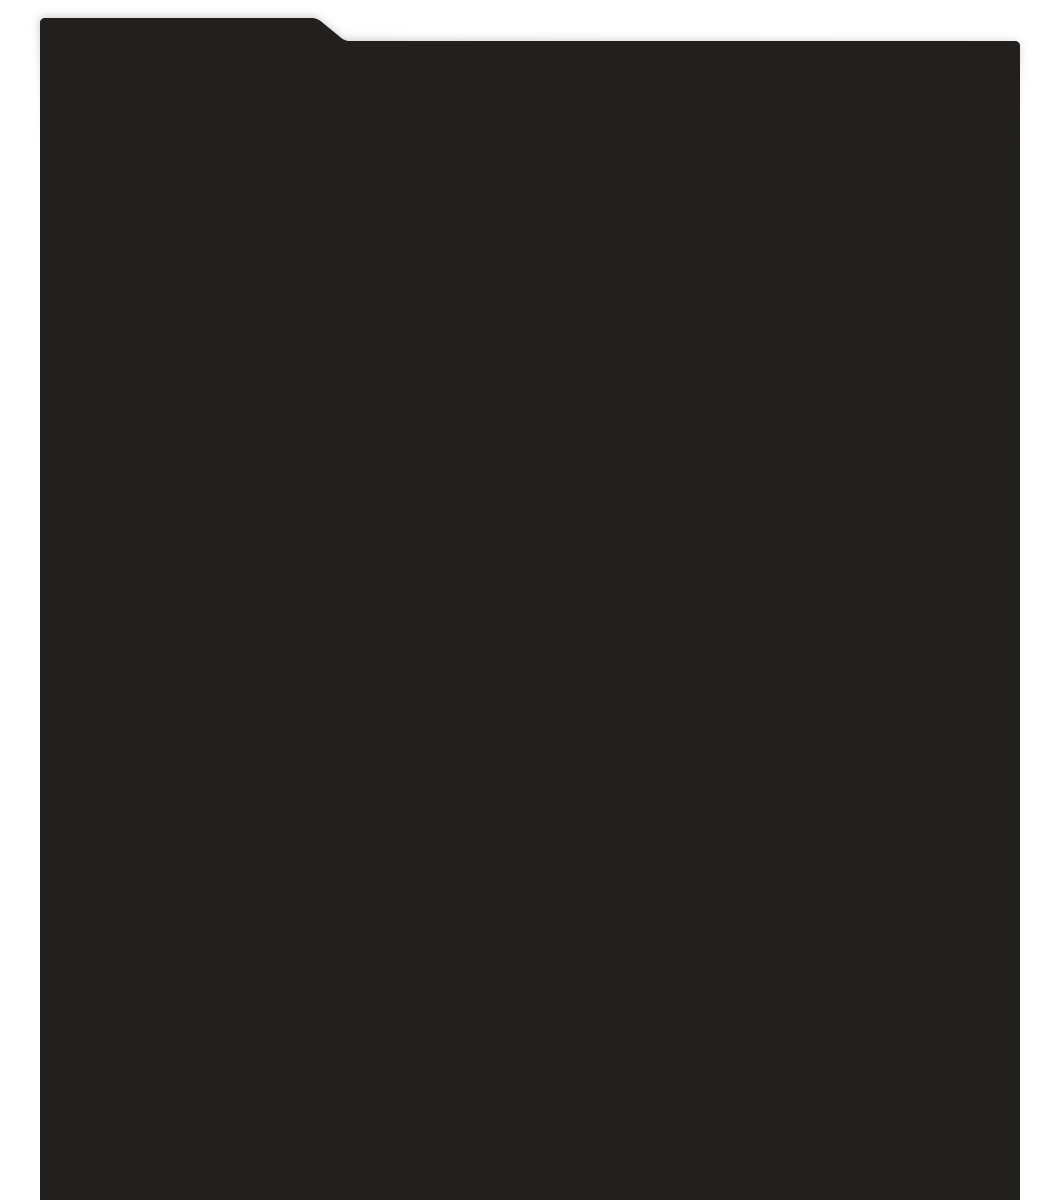
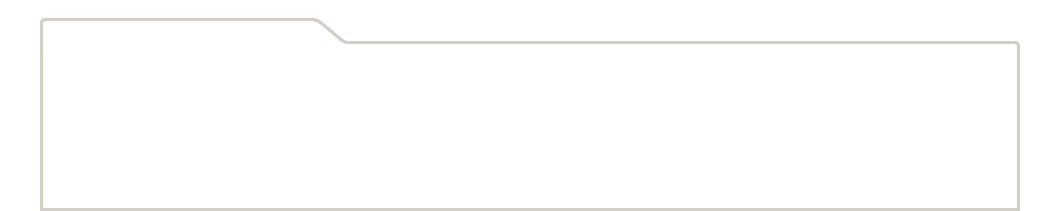
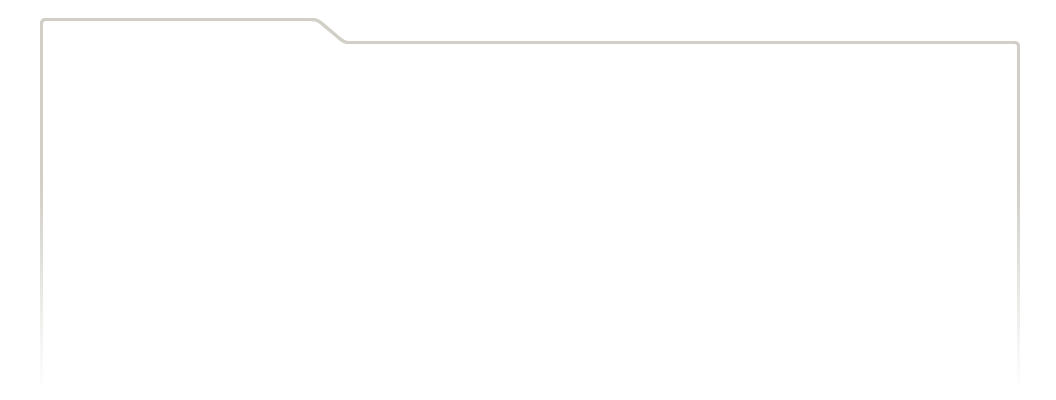
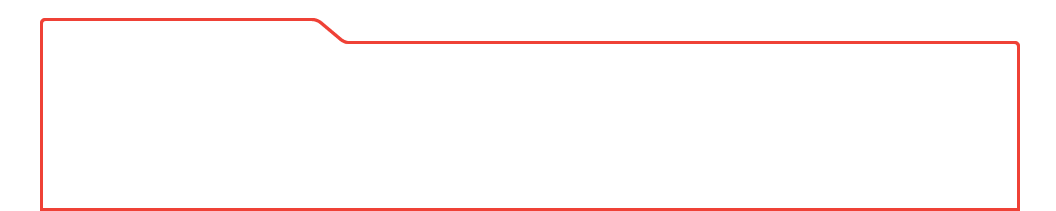
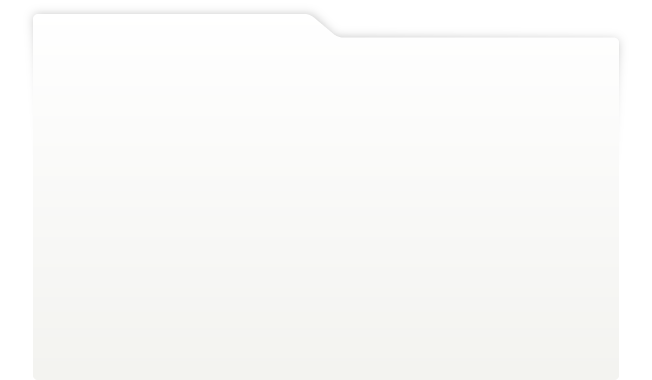
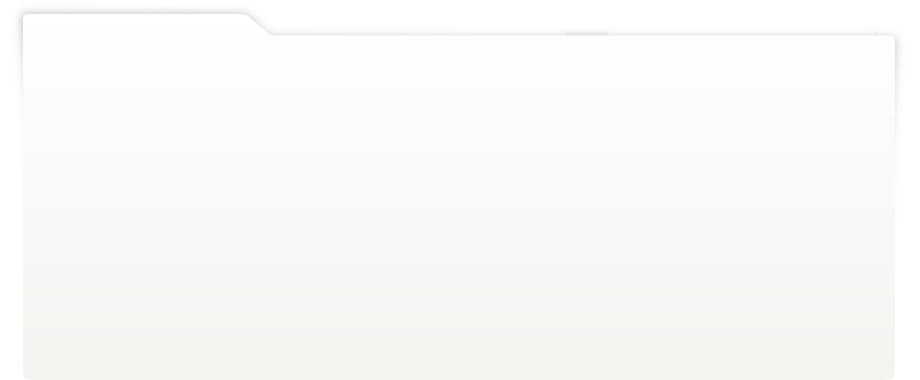
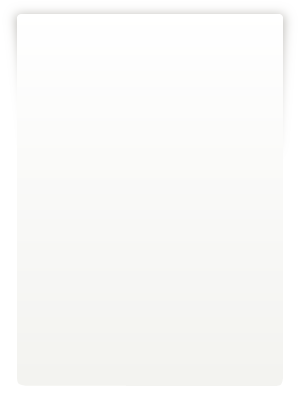
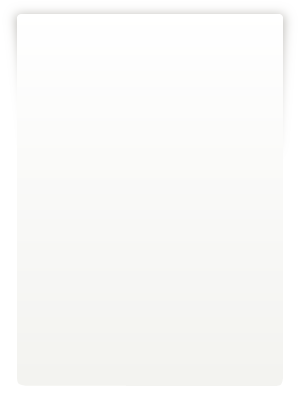
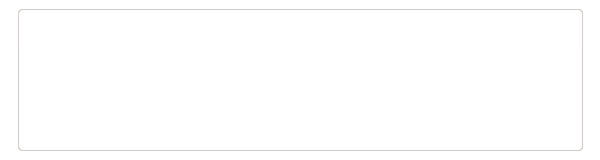
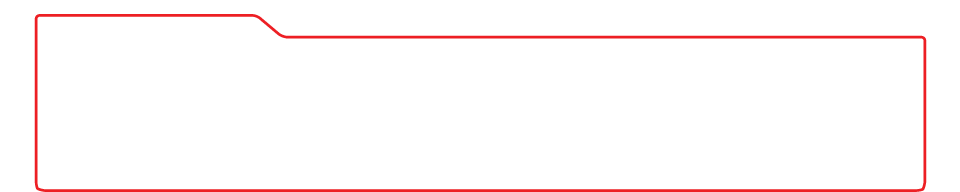
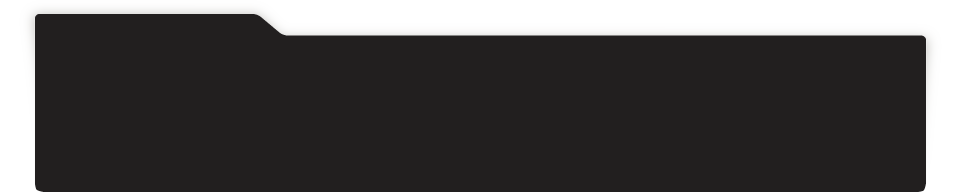
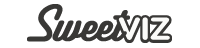
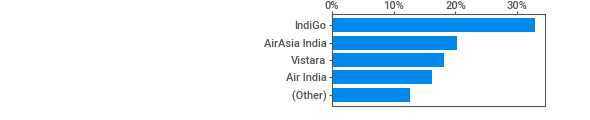
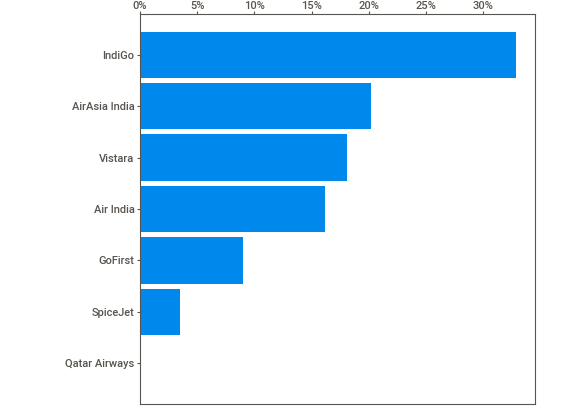
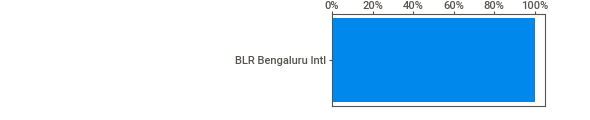
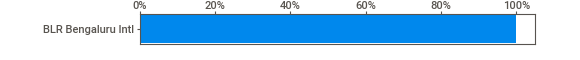
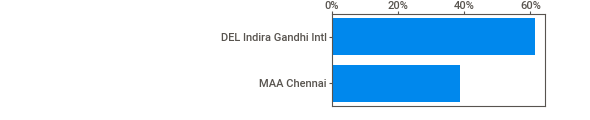
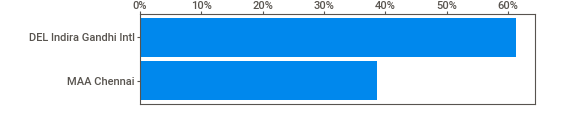
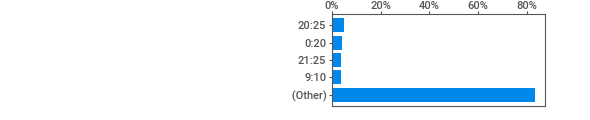
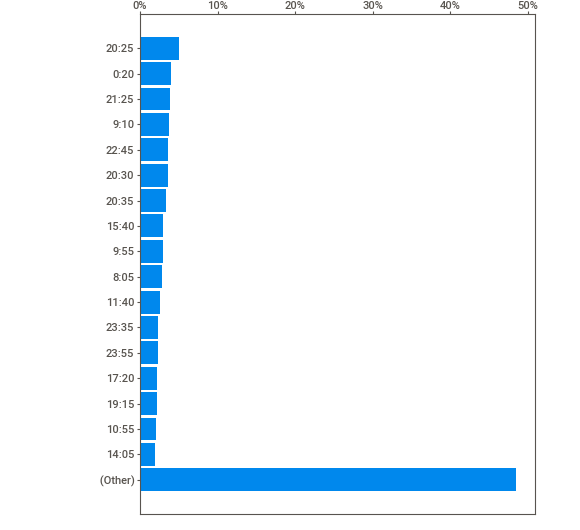
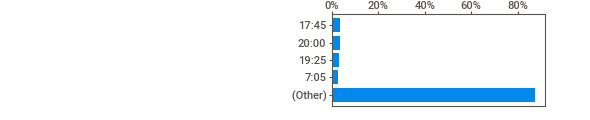
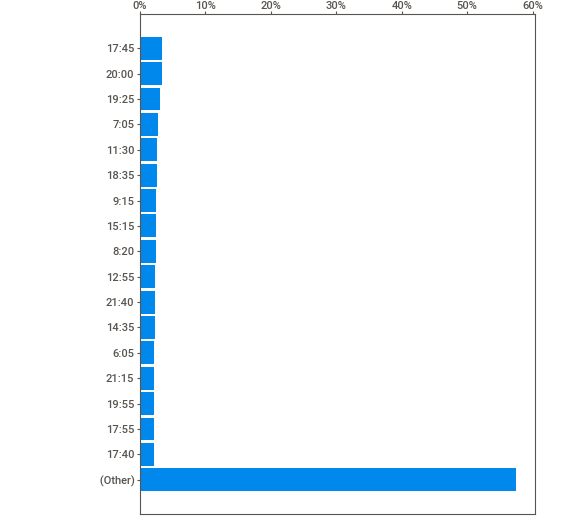
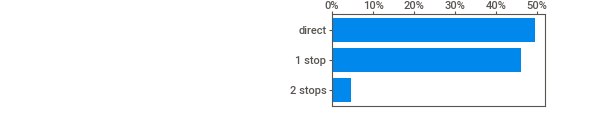
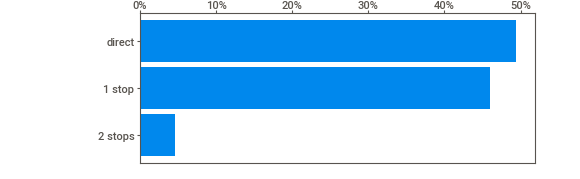
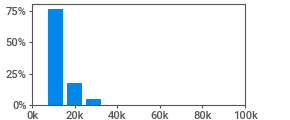
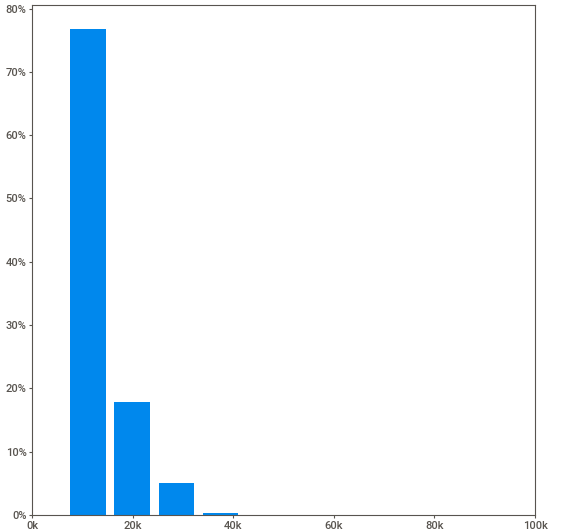
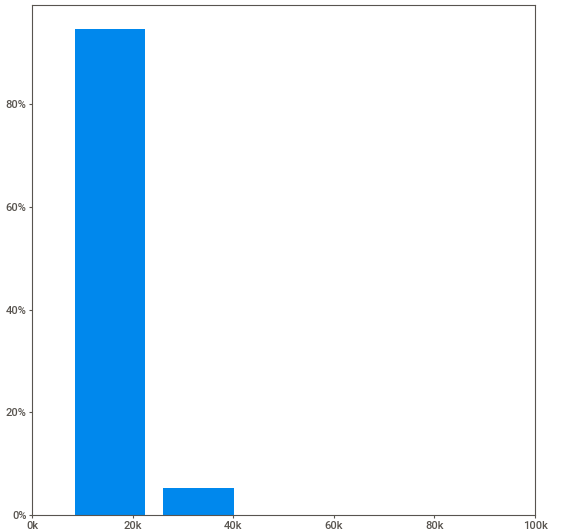
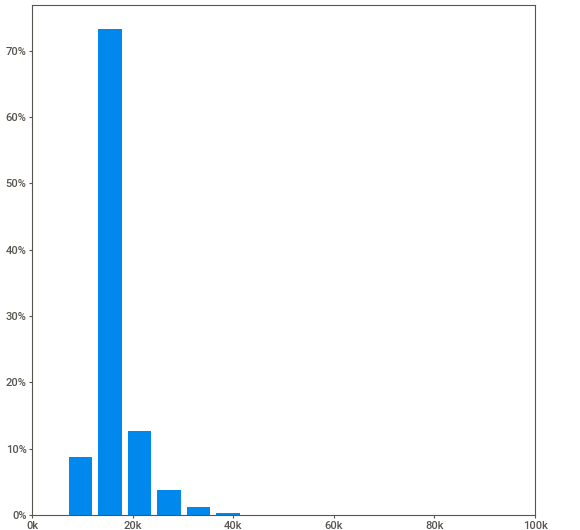
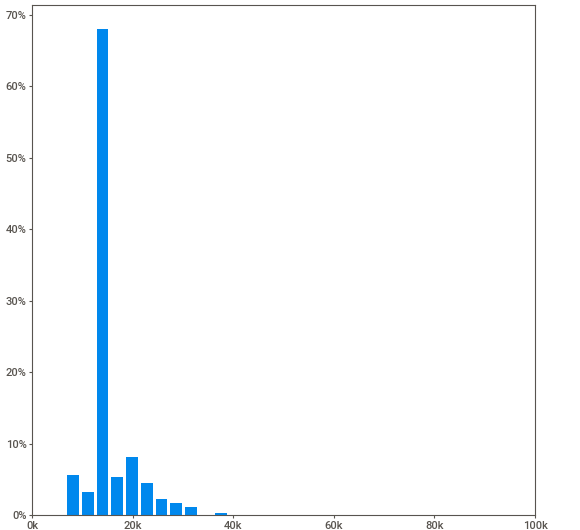
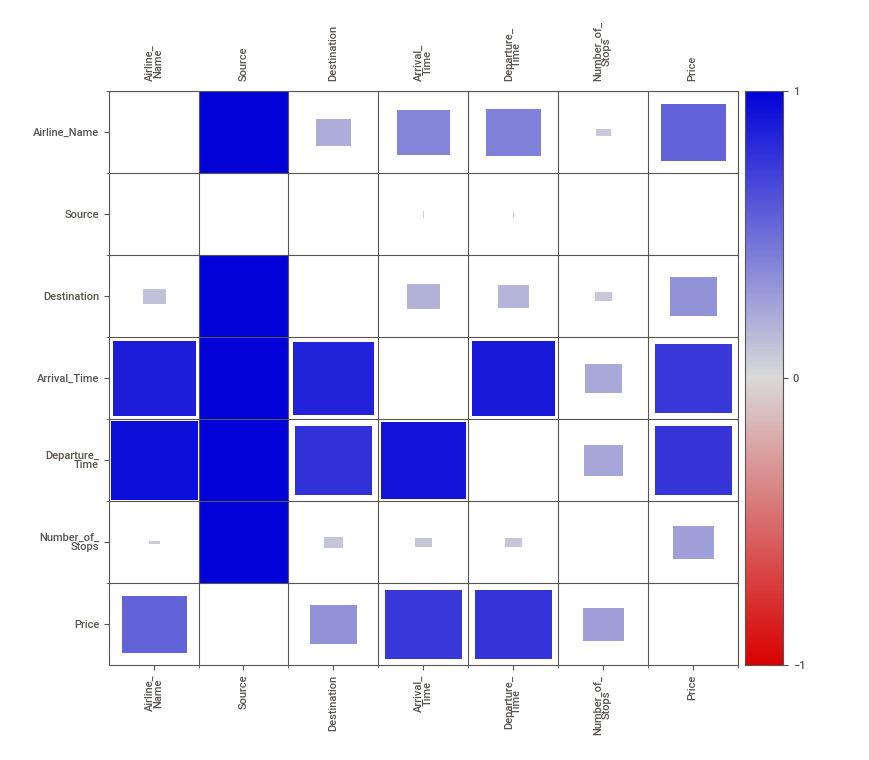
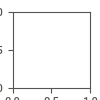

Report 'sweetviz_flightprice.html' was saved to storage.


In [9]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook(filepath='sweetviz_flightprice.html', layout='widescreen', w=900)

# The stats of the dataset

### We can notice only "Price" is the numeric value and we are not applying anything on this a it's the target variable

In [10]:
df.describe()

,Price
count,1981.000000
mean,15918.106512
std,4659.557953
min,6698.000000
25%,14902.000000
50%,14913.000000
75%,15128.000000
max,94691.000000


## From info we get to know that:

### there are no missing variables

In [11]:
df.isnull().sum()

Airline_Name       0
Source             0
Destination        0
Arrival_Time       0
Departure_Time     0
Number_of_Stops    0
Price              0
dtype: int64

### From the info fucntion, we know there are 6 object features and only 1 inte64 feature that is also the target varaibale.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline_Name     1981 non-null   object
 1   Source           1981 non-null   object
 2   Destination      1981 non-null   object
 3   Arrival_Time     1981 non-null   object
 4   Departure_Time   1981 non-null   object
 5   Number_of_Stops  1981 non-null   object
 6   Price            1981 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 108.5+ KB


# Let's check the same output using a Heatmap for the dataset

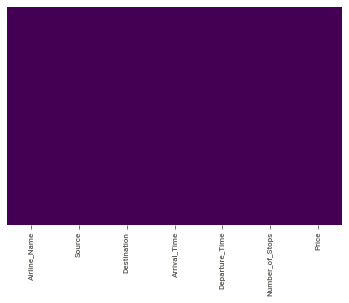

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

#### From the below plot with respect to training dataset, we can see that IndiGo holds a large share of business in this sector with about 32.86 % followed by AirAsia India and Vistara.

#### However this data is valid only for the date 25th Oct 2021

In [22]:
airline_percent = (df["Airline_Name"].value_counts()/df.shape[0])*100
print(airline_percent)

IndiGo           32.862191
AirAsia India    20.191822
Vistara          18.122161
Air India        16.203937
GoFirst           9.035840
SpiceJet          3.533569
Qatar Airways     0.050480
Name: Airline_Name, dtype: float64


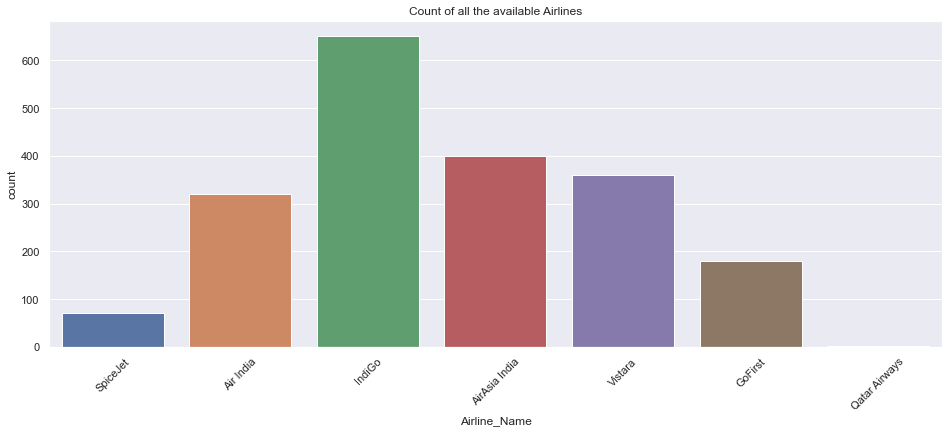

In [24]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Airline_Name", data=df).set(title='Count of all the available Airlines') 
plt.xticks(rotation=45)
plt.show()

### Since this data was scrapped from a website Kayak.com, the source is teh same i.e. Bangalore and hence we have no other places

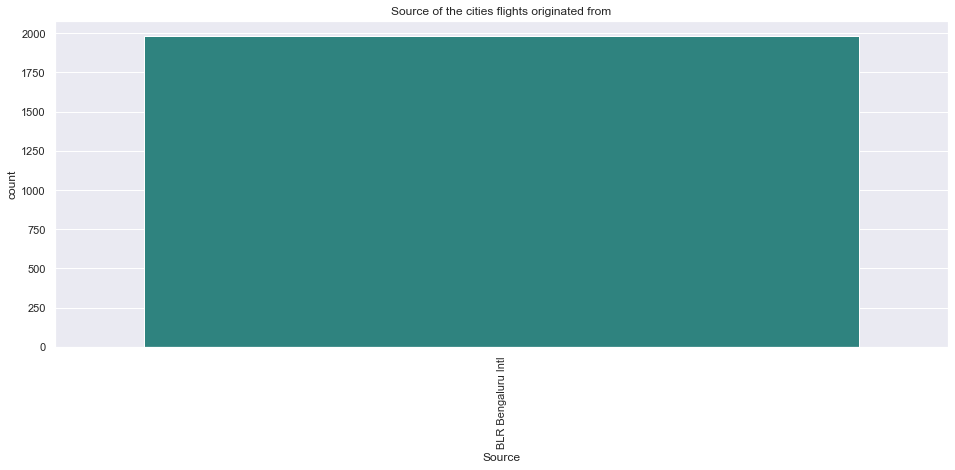

In [26]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Source", data=df, palette= "viridis").set(title='Source of the cities flights originated from') 
plt.xticks(rotation=90)
plt.show()

#### We can see from the below plot that people Delhi compared to Chennai. 

#### This data cannot be generalized because these were the only destinations that appeared in the search bar.

#### Also, Chennai being one of the busiest metropolitan cities, we can see why a lot of passengers seem to travel there.

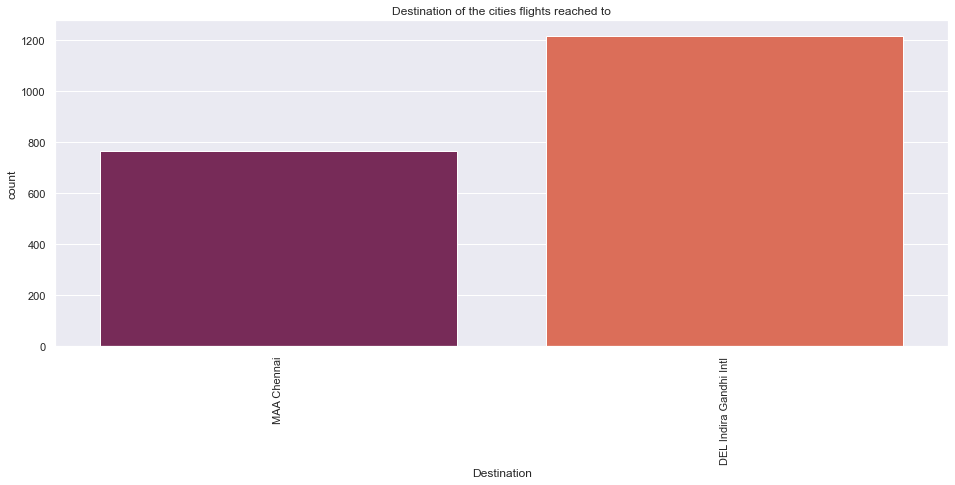

In [29]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Destination", data=df, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
plt.show()

#### We can see from the below plot the airline prices for all the companies

#### It appears Qatar Airways has the highest price for the ticket compared to other airlines.

#### It could be because all the remaining flights are domestic and Qatar Airways is the only international flight operating amongst these. The tariff changes, etc may seem to affect. Moreover prices depend on the brand and it's purchase power and Qatar Airways have a good stake in airline industry.

#### This could be the reason for massive price hike for domestic travel.

#### However, in general price of the ticket should not cost more than 15,000 to 20,000 Rs. and Qatar Airways tickets are going above 80,000 Rs.

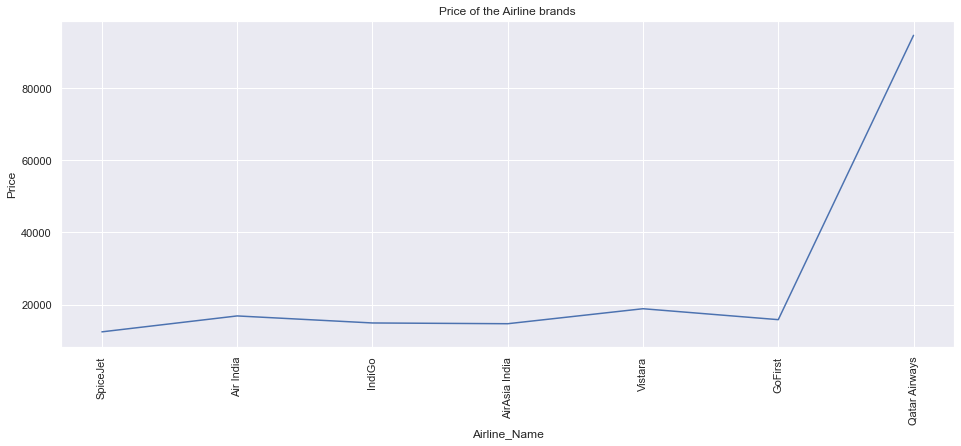

In [30]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Airline_Name", y="Price", ci=None).set(title='Price of the Airline brands')
plt.xticks(rotation=90)
plt.show()

#### From the below plot we can see how the total stops influence prices.

#### In general sense, flights with single or no stops are cheaper than the flights having multiple stops. But in this case we can see that flights with 2 stops have a higher price compared to the other flights.

#### Having multiple stops means airline is liable for hangar rent, and other taxes and unless they plan to travel far, having additional stops will add more cost to the airline companies.

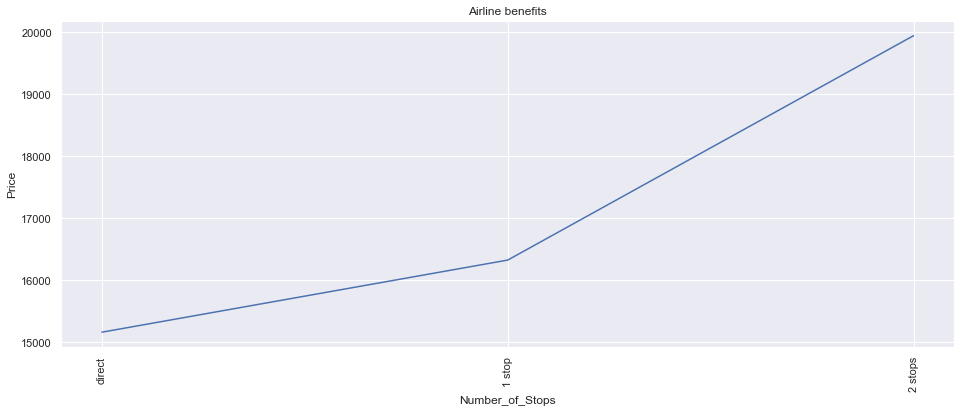

In [32]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Number_of_Stops", y="Price", ci=None).set(title='Airline benefits')
plt.xticks(rotation=90)
plt.show()

#### The below plot shows us the number of stops given by flights

#### We can see majority of flights have "one stop" and this shows that flights have reached directly to the destination with more amout of time for halt.

#### This also tells us that for domestic travel passengers do not prefer connecting flights as it's time consuming. 

#### However we can also see that people have opted for "non-stop" flights. These are as same as "one-stop" but here there is essentially no stop at all. Flight may take time to refuel and that's it.

#### This is common for all economy flights or airlines that have cheap tickets beacuse stopping at an airport means the airline company ahs to pay parking fees that could be huge even if it means staying only for sometime.

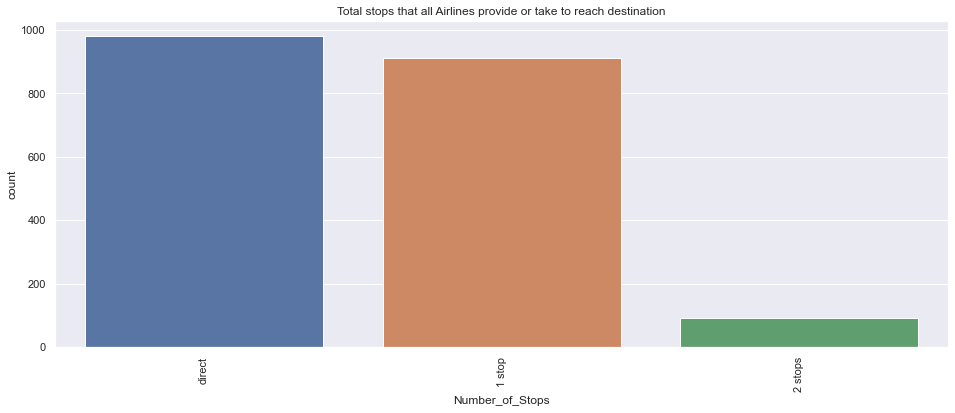

In [34]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Number_of_Stops", data=df).set(title='Total stops that all Airlines provide or take to reach destination') 
plt.xticks(rotation=90)
plt.show()

#### Displaying the total columns names to select features for encoding

In [16]:
df.columns

Index(['Airline_Name', 'Source', 'Destination', 'Arrival_Time',
       'Departure_Time', 'Number_of_Stops', 'Price'],
      dtype='object')

# Encoding the dataset

### I have used LabelEncoder the following columns

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the dataset

df.Airline_Name = encoder.fit_transform(df.Airline_Name)
df.Source = encoder.fit_transform(df.Source)
df.Destination = encoder.fit_transform(df.Destination)
df.Arrival_Time = encoder.fit_transform(df.Arrival_Time)
df.Departure_Time = encoder.fit_transform(df.Departure_Time)
df.Number_of_Stops = encoder.fit_transform(df.Number_of_Stops)


# Datasets have now been encoded

In [19]:
df.head()

,Airline_Name,Source,Destination,Arrival_Time,Departure_Time,Number_of_Stops,Price
0,5,0,1,61,62,2,6858
1,0,0,1,65,67,2,6698
2,0,0,1,65,67,2,6699
3,0,0,1,65,67,2,6699
4,0,0,1,65,67,2,6699


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine .

In [20]:
df.describe()

,Airline_Name,Source,Destination,Arrival_Time,Departure_Time,Number_of_Stops,Price
count,1981.000000,1981.0,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,2.634528,0.0,0.386673,35.662797,36.799596,1.034831,15918.106512
std,1.999419,0.0,0.487111,21.056283,21.562775,0.976128,4659.557953
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6698.000000
25%,1.000000,0.0,0.000000,19.000000,20.000000,0.000000,14902.000000
50%,3.000000,0.0,0.000000,38.000000,37.000000,1.000000,14913.000000
75%,3.000000,0.0,1.000000,51.000000,51.000000,2.000000,15128.000000
max,6.000000,0.0,1.000000,72.000000,77.000000,2.000000,94691.000000


# Distribution of all the columns in the dataset


### All the features are categorical hence there is no point in looking at distribution. The only numerical feature we have is "Price" which is the target variable and we make no changes to that

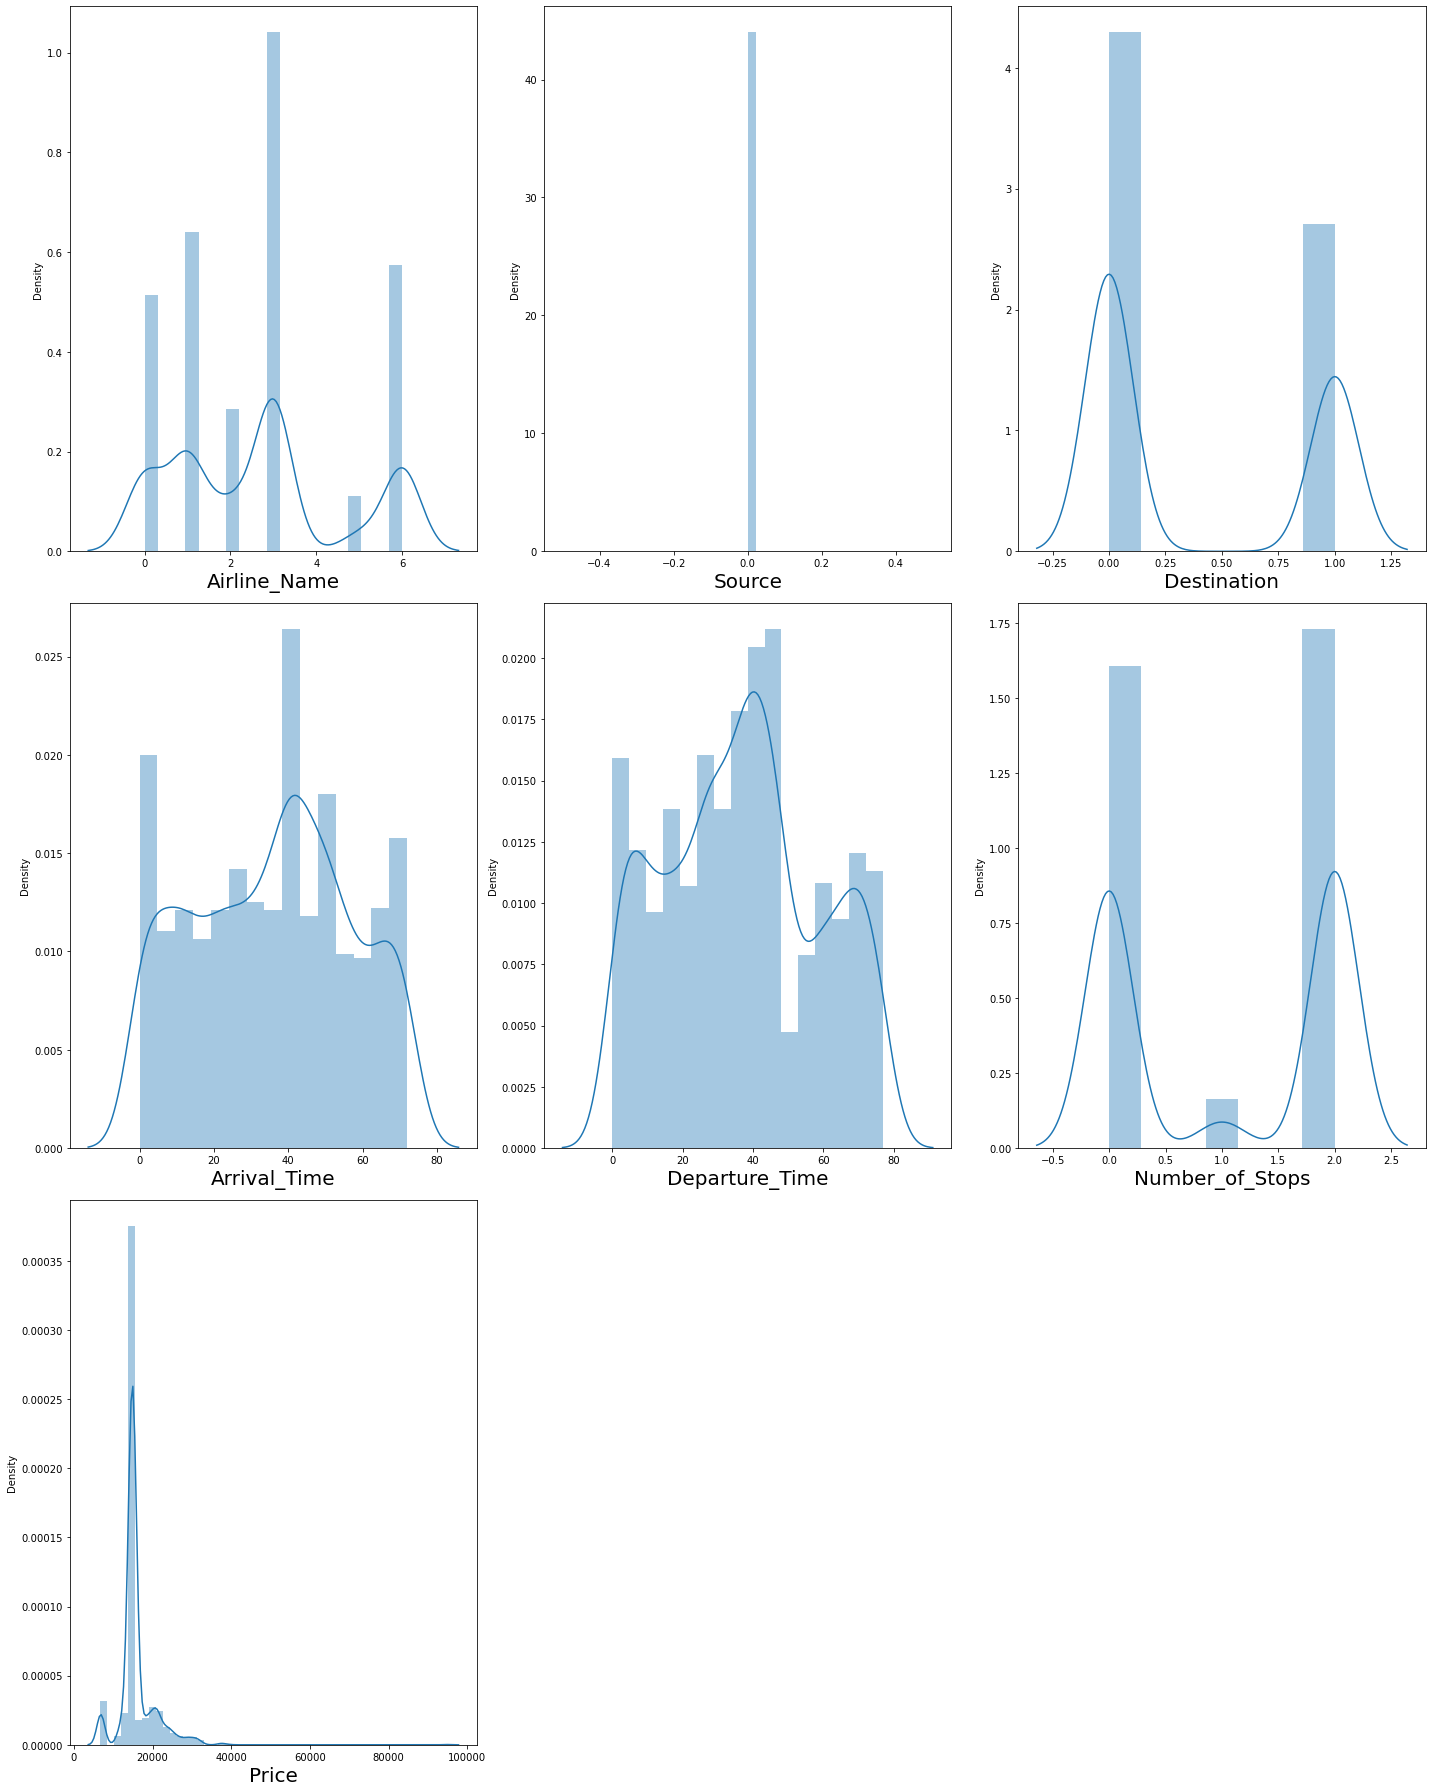

In [21]:
# let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=7:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Price"

#### We can see columns "Destination", "Airline_Name" and "Number_of_Stops" have a string correlation with the target variable "Price".

In [23]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Destination        0.294884
Airline_Name       0.154786
Arrival_Time       0.076089
Departure_Time     0.069302
Number_of_Stops   -0.123373
Source                  NaN
Name: Price, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification


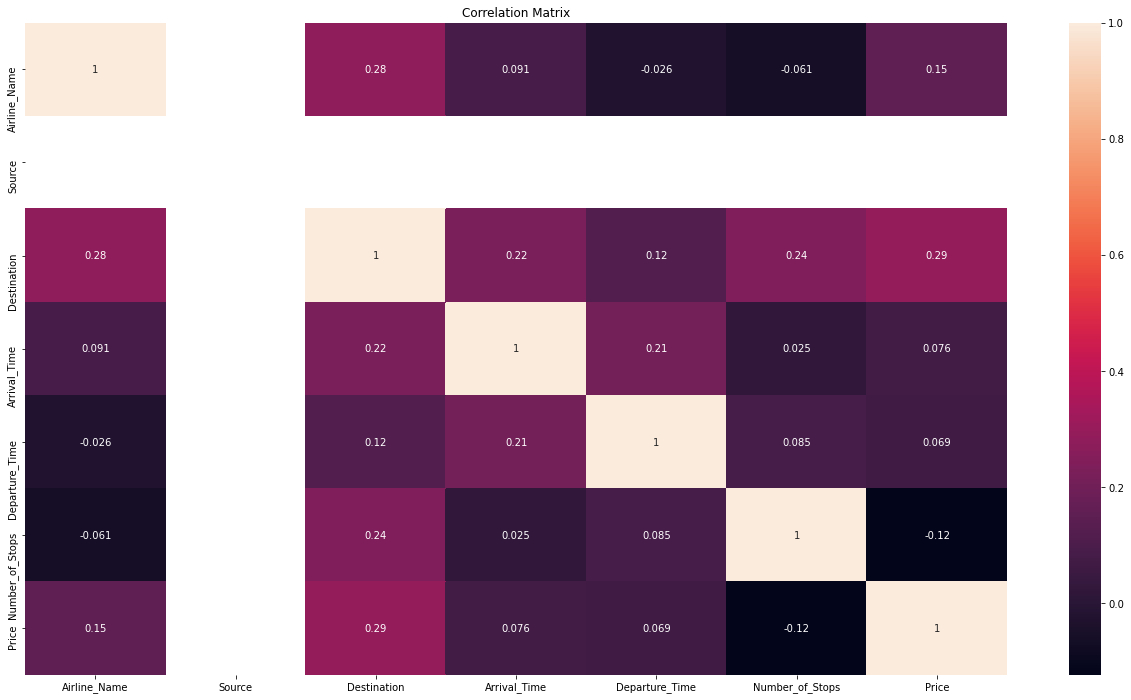

In [24]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [25]:
# train dataset with featurs only
x = df.drop(columns = ["Price"], axis=1)
y = df["Price"]

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# split the dataset into train and test data set

In [73]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 350)


# Create multi output regression models


#### In this scenario I have used a total of 5 regression algorithms including ensemble algorithms.



### 1) DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7825238726711655
Mean Absolute Error (MAE):  1458.6239114129996
Mean Squared Error (MSE):  8980857.10308428
Root Mean Squared Error (RMSE):  2996.8078188439576


### 2) RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7537305089928719
Mean Absolute Error (MAE):  1443.9877924721734
Mean Squared Error (MSE):  8117603.630589096
Root Mean Squared Error (RMSE):  2849.1408583271373


### 3) ExtraTreesRegressor

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7825238726711655
Mean Absolute Error (MAE):  1450.964459128461
Mean Squared Error (MSE):  8537160.38039416
Root Mean Squared Error (RMSE):  2921.841949934007


### 4) GradientBoostingRegressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

grid_reg = GradientBoostingRegressor()
grid_reg.fit(x_train,y_train)

y_pred = grid_reg.predict(x_test)

print("Adjusted R2 squared : ",grid_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7109364051509091
Mean Absolute Error (MAE):  1522.5490354570732
Mean Squared Error (MSE):  7940017.767542681
Root Mean Squared Error (RMSE):  2817.803713451787


### 5) ExtraTreeRegressor   ( not ensemble )

In [80]:
from sklearn.tree import ExtraTreeRegressor

ex_tree_reg = ExtraTreeRegressor()
ex_tree_reg.fit(x_train,y_train)

y_pred = ex_tree_reg.predict(x_test)

print("Adjusted R2 squared : ",ex_tree_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7825238726711655
Mean Absolute Error (MAE):  1472.431799862497
Mean Squared Error (MSE):  8759034.1146687
Root Mean Squared Error (RMSE):  2959.5665416862485


# Cross validation to check if its overfitting

In [44]:
from sklearn.model_selection import cross_val_score

In [118]:
scr = cross_val_score(dt_reg, x, y, cv=5, scoring="adjusted_rand_score")
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.11516262958273207


In [120]:
scr = cross_val_score(rf_reg, x, y, cv=5, scoring="adjusted_rand_score")
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.1074408559658985


In [122]:
scr = cross_val_score(extra_reg, x, y, cv=5, scoring="adjusted_rand_score")
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.12593865524721176


In [125]:
scr = cross_val_score(grid_reg, x, y, cv=5, scoring="adjusted_rand_score")
print("Cross Validation score of GradientBoostingRegressor model is:", scr.mean())

Cross Validation score of GradientBoostingRegressor model is: 0.11084043583684974


In [126]:
scr = cross_val_score(ex_tree_reg, x, y, cv=5, scoring="adjusted_rand_score")
print("Cross Validation score of ExtraTreeRegressor model is:", scr.mean())

Cross Validation score of ExtraTreeRegressor model is: 0.10663015796434316


# Selecting the best ML model for this dataset

#### From the below, it appears GradientBoostingRegressor is the appropriate algorithm for this scenario.

#### The difference between the adjusted R2 score and cross validation is much less for this algorithm compared to other 4 algorithms used.


| Sr.No | Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeRegressor | 0.782523872671165 | 0.115162629582732 | 0.667361243088433 |
| 2 | RandomForestRegressor | 0.753730508992871 | 0.107440855965898 | 0.646289653026973 |
| 3 | ExtraTreesRegressor | 0.782523872671165 | 0.125938655247211 | 0.656585217423954 |
| 4 | GradientBoostingRegressor | 0.710936405150909 | 0.110840435836849 | 0.60009596931406 |
| 5 | ExtraTreeRegressor | 0.782523872671165 | 0.106630157964343 | 0.675893714706822 |

# Hyper Parameter Tuning
### Let us try to tune the proposed model (GradientBoostingRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters


In [130]:
parameters = {"loss":["squared_error", "absolute_error", "huber", "quantile"],
              "criterion":["friedman_mse", "mse", "mae", "squared_error"],
              "max_features":["auto", "sqrt", "log2"],
              "n_estimators":[50, 70, 90, 100, 130, 150],
              "random_state":[50, 70, 90, 100, 130, 150],
              "tol":[1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
              }

### RandomizedSearchCV is used to tune the parameters by fitting the same to the training dataset

In [131]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_iter=10)

In [132]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae', 'squared_error'],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 70, 90, 100, 130,
                                                         150],
                                        'random_state': [50, 70, 90, 100, 130,
                                                         150],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]})

In [133]:
RCV.best_params_

{'tol': 1e-05,
 'random_state': 150,
 'n_estimators': 130,
 'max_features': 'auto',
 'loss': 'huber',
 'criterion': 'mse'}

### Rebuild the model using the appropriate params we recieved from best_params_

In [134]:
mod_grid_reg = GradientBoostingRegressor(tol= 1e-05, random_state= 150, n_estimators= 130, max_features= "auto",
                                         loss= "huber", criterion= "mse")

mod_grid_reg.fit(x_train,y_train)
pred = mod_grid_reg.predict(x_test)
pred

array([15880.9215685 , 32181.30966232, 14489.86738242, 20723.66722366,
       14680.65212527, 15085.59646836, 13869.87169085, 14805.54978653,
       16622.39425103, 15880.9215685 , 22102.05724731, 15033.77886747,
       20821.85297422, 14501.18159301, 19256.94039052, 13257.2058375 ,
       15880.9215685 , 14702.89220635, 14843.31836924, 15209.59147518,
       14831.99208678, 13257.2058375 , 14907.76696905, 14753.06740324,
       14737.55062526, 14578.2023501 , 18962.05787326, 13839.92247283,
       14578.2023501 ,  9619.36260326, 14964.92634648, 15880.9215685 ,
       14823.05402564,  8858.49612282, 17918.3808849 , 14641.62249048,
       14930.35993148, 15209.59147518, 14947.95180449, 14955.56256418,
       15470.10957525, 14641.62249048, 21712.2473443 , 15085.59646836,
       14689.51727873, 14431.19497061, 14915.13562723, 14930.35993148,
       14823.05402564, 14964.92634648, 14878.55938121, 14498.57982699,
       17716.22684025,  9619.36260326, 21670.26990383, 15945.49394399,
      

# Saving the model (using joblib)

In [135]:
import joblib
joblib.dump(mod_grid_reg,"Flight_Price_Scraping.pkl")

['Flight_Price_Scraping.pkl']

# Loading the saved model

In [136]:
model = joblib.load("Flight_Price_Scraping.pkl")

### Making prediction using the test values as shown below

In [138]:

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,15880.921569
1,32181.309662
2,14489.867382
3,20723.667224
4,14680.652125
...,...
590,14753.067403
591,14805.549787
592,14900.546380
593,15005.919510


# Model Dashboard using LIME library

In [183]:
import lime
from lime import lime_tabular

In [185]:
intepretor = lime_tabular.LimeTabularExplainer(
             training_data= np.array(x_train),
             feature_names = X_train.columns,
             mode = "regression"
                    )

In [202]:
exp = intepretor.explain_instance(
         data_row = X_test.iloc[4],
         predict_fn = mod_grid_reg.predict
            )

exp.show_in_notebook(show_table= True)